In [1]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt

In [2]:
def square(x: ndarray) -> ndarray:
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    return np.maximum(0.2 * x, x)

def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-x))

Text(0, 0.5, 'output')

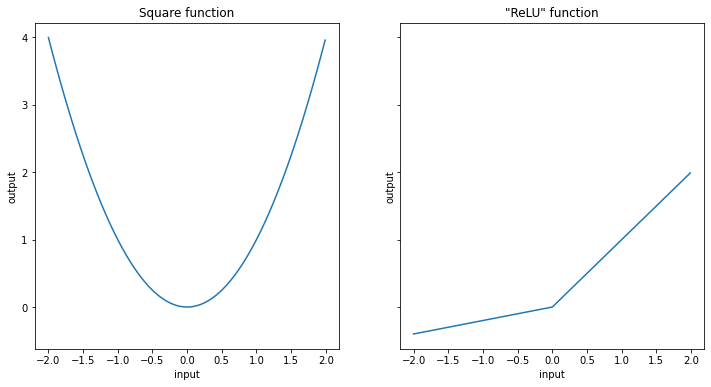

In [3]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
input_range = np.arange(-2, 2, 0.01)

ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')

In [4]:
from typing import Callable

#deriv(function, input, diff)
def deriv(func: Callable[[ndarray], ndarray], input_: ndarray, diff: float = 0.001) -> ndarray:
    return (func(input_ + diff) - func(input_ - diff))/(2*diff)

deriv(square,10)

19.999999999988916

In [5]:
from typing import List

#A function that takes an array, and spits out an array
Array_Function = Callable[[ndarray],ndarray]

#A list of Array functions
Chain = List[Array_Function]

In [6]:
def chain_length_2(chain: Chain, x: ndarray) -> ndarray:
    assert len(chain) == 2
    
    f1 = chain[0]
    f2 = chain[1]
    
    return f2(f1(x))

In [7]:
chain_1 = [square, sigmoid]
chain_length_2(chain_1,np.array([-1,0,1]))

array([0.73105858, 0.5       , 0.73105858])

In [8]:
def chain_deriv_2(chain: Chain, x: ndarray) -> ndarray:
    assert len(chain) == 2
    
    f1 = chain[0]
    f2 = chain[1]
    
    #f1(x) = u
    u = f1(x) 
    
    #df1/dx = du/dx
    dudx = deriv(f1,x)
    
    #df2/du
    df2du = deriv(f2, u)
    
    #df2/dx = df2/du*du/dx
    return df2du*dudx

In [9]:
chain = [square, sigmoid]

#value at x = 2
print("f2(f1(2)) \t=",chain_length_2(chain,2))

#derivate at x = 2
print("df2/dx \t\t=",chain_deriv_2(chain,2))


f2(f1(2)) 	= 0.9820137900379085
df2/dx 		= 0.0706508353807067


In [10]:
#chacking the derivative
diff = 0.0001

print("df2/dx \t\t=",(chain_length_2(chain,2+diff)-chain_length_2(chain,2-diff))/(2*diff))

df2/dx 		= 0.07065082585744342


In [11]:
chain = [square, sigmoid]

#value at x = 2
print("f2(f1(2)) \t=",chain_length_2(chain,np.array([-1,0,1])))

#derivate at x = 2
print("df2/dx \t\t=",chain_deriv_2(chain,np.array([-1,0,1])))

f2(f1(2)) 	= [0.73105858 0.5        0.73105858]
df2/dx 		= [-0.39322385  0.          0.39322385]


In [12]:
#forward pass of f2(f1(X)) where f1 is X@W and f2 is a sigmoid function
def matrix_forward(X: ndarray, W: ndarray, sigma: Array_Function) -> ndarray:
    assert X.shape[1] == W.shape[0]
    
    # matrix multiplication
    N = X@W
    
    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)
    
    return S

In [13]:
def matrix_backward(X: ndarray, W: ndarray, sigma: Array_Function) -> ndarray:
    assert X.shape[1] == W.shape[0]
    
    # matrix multiplication
    N = X@W
    
    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)
    
    #find dS/dX = dS/dN*dN/dX
    
    #dN/dX
    dNdX = W.T
    
    #dS/dN
    dSdN = deriv(sigma,N)
    
    return dSdN*dNdX

In [14]:
np.random.seed(190203)
X = np.random.randn(1,3)
W = np.random.randn(3,1)
print("X: ", X)
forward_pass = matrix_forward(X, W, sigmoid)
print("Forward: ", forward_pass)
backward_pass = matrix_backward(X, W, sigmoid)
print("Backward: ", backward_pass)

X:  [[ 0.47231121  0.61514271 -1.72622715]]
Forward:  [[0.89779986]]
Backward:  [[ 0.08516695 -0.05574581 -0.11206627]]


In [15]:
def matrix_forward(X: ndarray, W: ndarray, sigma: Array_Function) -> float:
    assert X.shape[1] == W.shape[0]
    
    N = np.dot(X,W)
    
    S = sigma(N)
    
    L = np.sum(S)
    
    return L

In [16]:
def matrix_backward(X: ndarray, W: ndarray, sigma: Array_Function) -> ndarray:
    N = np.dot(X,W)
    
    S = sigma(N)
    
    L = np.sum(S)
    
    #dL/dS = ones
    dLdS = np.ones_like(S)
    
    #dS/dN
    dSdN = deriv(sigma, N)
    
    #dN/dX
    dNdX = W.T
    
    #dL/dX
    dLdX = (dLdS*dSdN)@dNdX
    
    return dLdX

In [17]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

In [18]:
print("X:")
print(X)
print("W:")
print(W)

X:
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]
W:
[[ 0.75510818  0.25562492]
 [-0.56109271 -0.97504841]
 [ 0.98098478 -0.95870776]]


In [19]:
print(matrix_forward(X,W,sigmoid))

2.3754951014116954


In [20]:
print(matrix_backward(X,W,sigmoid))

[[ 0.2488887  -0.37478057  0.01121962]
 [ 0.12604152 -0.27807404 -0.13945837]
 [ 0.22992798 -0.36623443 -0.02252592]]


In [30]:
from typing import Callable, Dict, Tuple, List

def forward(X: ndarray, y: ndarray, weights: Dict[str,ndarray]):
    N = X@weights['W']
    
    P = N + weights['B']
    
    loss = np.mean(np.power(y-P,2))
    
    forward_info = {}
    forward_info['X'] = X
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y
        
    return forward_info, loss

In [82]:
def gradient(forward_info, weights):
    
    #dL/dM
    dLdM = np.ones_like(forward_info['P'])
    
    #dM/dP
    dMdP = 2*(forward_info['P'] - forward_info['y'])
    
    #dP/dN
    dPdN = np.ones_like(forward_info['N'])
    
    #dN/dW
    dNdW = forward_info['X'].T
    
    #dP/dZ
    dPdZ = np.ones_like(forward_info['N'])
    
    #dZ/dB
    dZdB = np.ones_like(forward_info["N"]).T
    
    #dL/dW
    dLdW = dNdW@(dLdM*dMdP*dPdN)
    
    #print(dZdB.shape,dLdM.shape,dMdP.shape,dPdZ.shape)
    
    #dL/dB
    dLdB = dZdB@(dLdM*dMdP*dPdZ)
    
    gradients = {}
    gradients['W'] = dLdW
    gradients['B'] = dLdB
    
    return gradients    

In [83]:
def init_weights(n):
    weights = {}
    W = np.random.randn(n,1)
    B = np.random.randn(1,1)
    
    weights['W'] = W
    weights['B'] = B
    
    return weights

In [84]:
def train(X,y,n_iter=1000,learning_rate=0.01,batch_size=100,return_losses=False,return_weights=False):
    
    np.random.seed(42)
    start = 0
    
    weights = init_weights(X.shape[1])
    
    perm = np.random.permutation(X.shape[0])
    X, y = X[perm], y[perm]
    
    if return_losses:
        losses = []
        
    for i in range(n_iter):
        if start >= X.shape[0]:
            perm = np.random.permutation(X.shape[0])
            X,y, = X[perm], y[perm]
            start = 0
        
        if start+batch_size > X.shape[0]:
            batch_size = X.shape[0] - start
            
        X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]
        start += batch_size
        
        forward_info, loss = forward(X_batch, y_batch, weights)
        
        if return_losses:
            losses.append(loss)
            
        loss_grads = gradient(forward_info,weights)
        #print(loss)
        
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]
            
    if return_weights:
        return losses, weights

In [85]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
X = boston.data
y = boston.target
features = boston.feature_names
s = StandardScaler()
X = s.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

#since our train function assumes y to be shape of (n, 1)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [91]:
train_info = train(X_train, y_train,n_iter = 10000,
                   learning_rate = 0.001,batch_size=23,
                   return_losses=True,return_weights=True)

losses = train_info[0]
weights = train_info[1]

In [92]:
def predict(X,weights):
    N = X@weights['W']
    return N + weights['B']

In [93]:
y_pred = predict(X_test,weights)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("$R^2$: ", r2_score(y_test, y_pred))

MSE:  21.96221945833455
$R^2$:  0.7052569177141323


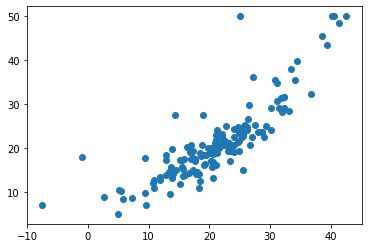

In [94]:
plt.scatter(y_pred,y_test)